In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [17]:
data_path = '/home/sean/mea data/06/06_spk_freq_table_bin60.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [18]:
condition_cols = {
    'NaCl': 1,
    'DTX_10nM': 2,
    'DTX_100nM': 3,
    'PTX_0.5uM': 4,
    'Control': 5,
    'Ba_0.1mM': 6,
    'KCl_0.1mM': 7,
    'DMSO': 8,
}

def create_well_assignment_filter(cond_name):
    def well_assignment_filter(unit_name):
        col = mc.get_col_number(unit_name)
        return col == condition_cols[cond_name]
    return well_assignment_filter

well_filter_dict = {cond_name: create_well_assignment_filter(cond_name) for cond_name in condition_cols.iterkeys()}


In [19]:
cat_table = plotting.construct_categorized_dataframe(data_table, well_filter_dict)
cat_table['spike_freq'] = cat_table['spike_freq']/60 # convert from spikes/1 minute to spikes/second
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=20) # smooth using a 20 minute kernel

In [20]:
# get rid of times at beginning and end of each 1 hr recording
cat_table = cat_table.query('''(time > "2017-08-31 18:16:00" & time < "2017-08-31 19:16:00") \
                       | (time > "2017-08-31 20:16:00" & time < "2017-08-31 21:16:00") \
                       | (time > "2017-08-31 22:16:00" & time < "2017-08-31 23:16:00") \
                       | (time > "2017-09-01 00:16:00" & time < "2017-09-01 01:16:00") \
                       | (time > "2017-09-01 02:16:00" & time < "2017-09-01 03:16:00") \
                       | (time > "2017-09-01 04:16:00" & time < "2017-09-01 05:16:00") \
                       | (time > "2017-09-01 06:16:00" & time < "2017-09-01 07:16:00") \
                       | (time > "2017-09-01 08:16:00" & time < "2017-09-01 09:16:00") \
                       | (time > "2017-09-01 10:16:00" & time < "2017-09-01 11:16:00") \
                       | (time > "2017-09-01 12:16:00" & time < "2017-09-01 13:16:00") \
                       | (time > "2017-09-01 14:16:00" & time < "2017-09-01 15:16:00") \
                       | (time > "2017-09-01 15:41:00")''')
cat_table_big = cat_table.query('spike_freq > 1')
cat_table_small = cat_table.query('spike_freq < 1')

In [21]:
#baseline between 2017-08-31 18:16:00 and 2017-09-01 15:16:00

baseline_table = cat_table.query('time > "2017-08-31 18:16:00"').query('time < "2017-09-01 15:16:00"')
stim_table = cat_table.query('time > "2017-09-01 15:16:00"')

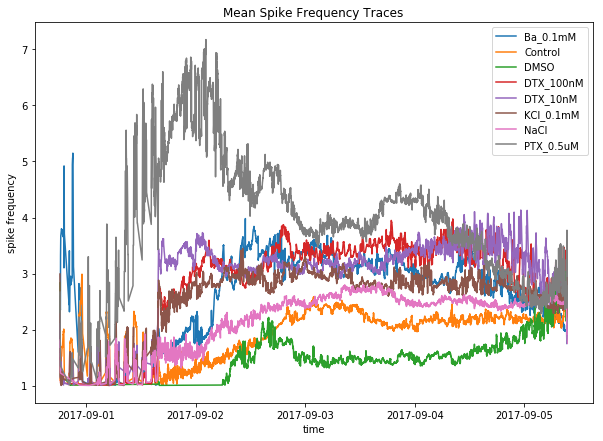

In [9]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table_big)

KeyboardInterrupt: 

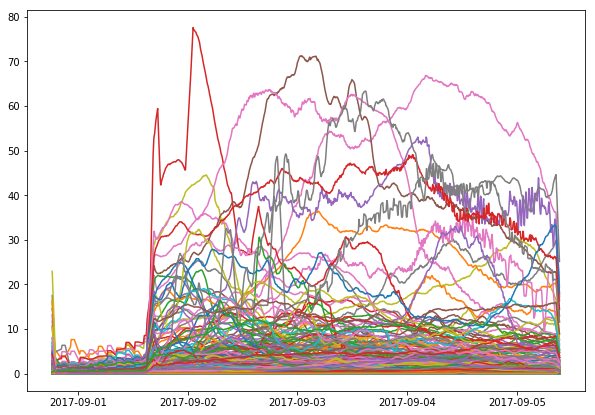

In [112]:
plt.figure(figsize=(10,7))
plotting.plot_unit_traces(cat_table)

pymea/plotting.py:443: RuntimeWarning: invalid value encountered in double_scalars
  


31
116


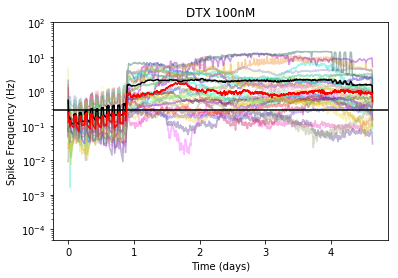

In [24]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DTX_100nM", 'DTX 100nM', var = 100, minHz = 0.05, maxHz = 100, ymax=100, plotFolds=False)

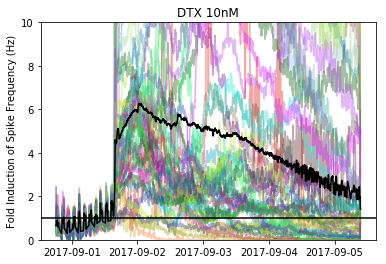

In [11]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DTX_10nM", 'DTX 10nM', minHz = 0.01)

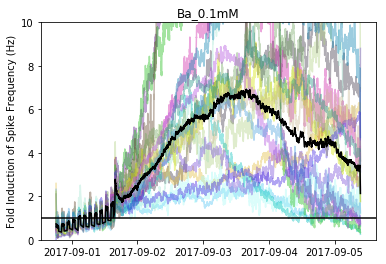

In [12]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "Ba_0.1mM", 'Ba_0.1mM', var=2.5, minHz = 0.01) 

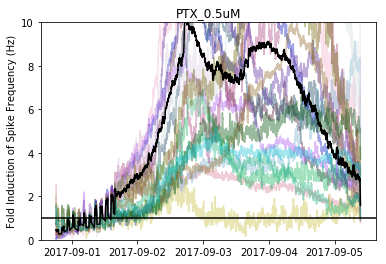

In [13]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "PTX_0.5uM", 'PTX_0.5uM', var=2.5, minHz = 0.01)


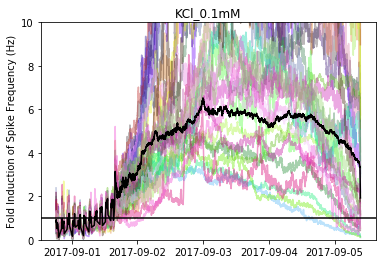

In [14]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "KCl_0.1mM", 'KCl_0.1mM', minHz = 0.01)

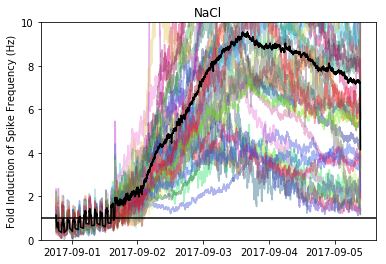

In [15]:

plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "NaCl", 'NaCl', minHz = 0.01)

pymea/plotting.py:429: RuntimeWarning: invalid value encountered in double_scalars
  varOfBaseline = (max(unit_b['spike_freq'])-min(unit_b['spike_freq']))/meanOfBaseline


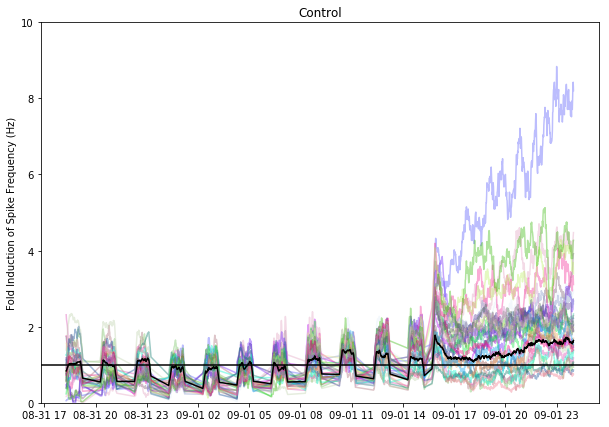

In [16]:
plt.figure(figsize=(10,7))
plotting.foldInductionPlusMean(cat_table.query('time < "2017-09-02"'), baseline_table, stim_table.query('time < "2017-09-02"'), "Control", 'Control', ind_filter = False, var = 2.5, minHz = 0.01)

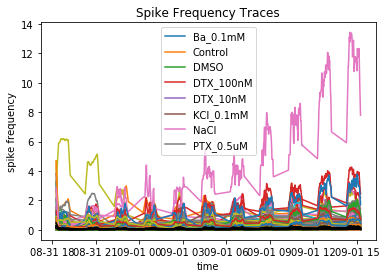

In [9]:
plotting.plot_unit_traces_plus_means(baseline_table)

pymea/plotting.py:508: RuntimeWarning: invalid value encountered in double_scalars
  plt.ylabel('Fold Induction of Spike Frequency (Hz)')


30
119


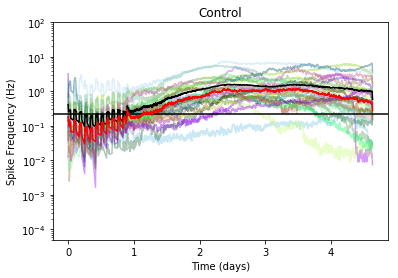

In [23]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "Control", 'Control', ind_filter = False, var = 2.5, minHz = 0.05, maxHz = 2, ymax=100, plotFolds=False)

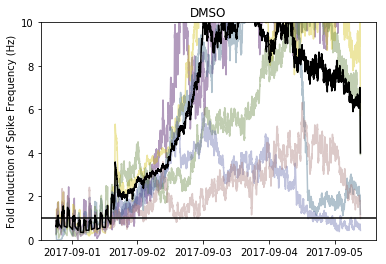

In [18]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DMSO", 'DMSO', ind_filter = False, minHz = 0.01)